# **Imort Drive**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Dataset**

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Franklin/oasis_longitudinal.csv')

# **Data Profiling**

In [ ]:
# Print the number of rows
print("Number of Rows:", len(df))

# Print the number of columns
print("Number of Columns:", len(df.columns))

# Display the first few rows of the DataFrame
print(df.head())

# Get summary statistics of the numerical columns
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# check column headers
print(df.columns)

Number of Rows: 373
Number of Columns: 15
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  
            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   6

# **Eploratory Data Analysis**

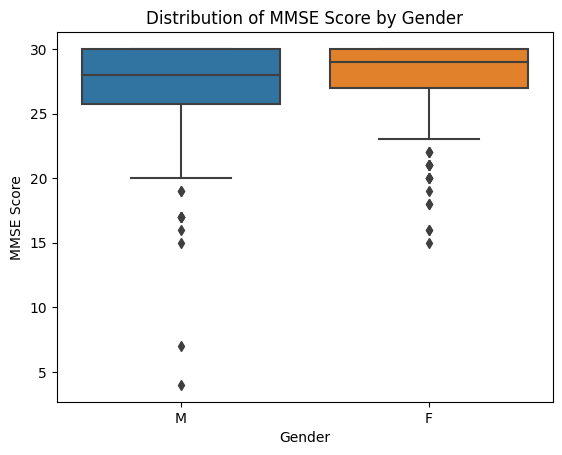

<ipython-input-15-ca2b04d7f540>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


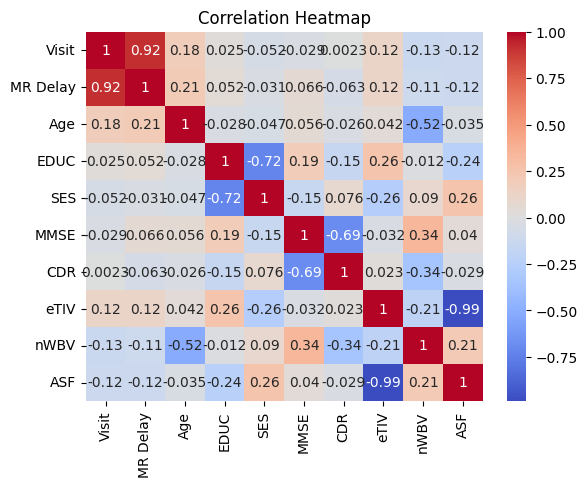

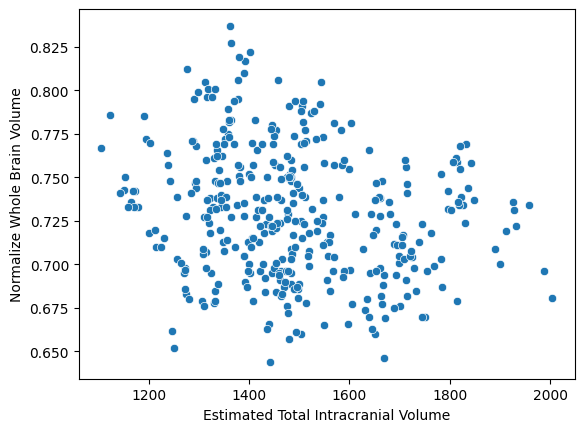

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization
# Example: Boxplot of MMSE score by gender
sns.boxplot(x='M/F', y='MMSE', data=df)
plt.xlabel('Gender')
plt.ylabel('MMSE Score')
plt.title('Distribution of MMSE Score by Gender')
plt.show()

# Feature Importance
# Example: Correlation Heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot a scatterplot of eTIV vs. nWBV
sns.scatterplot(data=df, x='eTIV', y='nWBV')
plt.xlabel('Estimated Total Intracranial Volume')
plt.ylabel('Normalize Whole Brain Volume')
plt.show()

# **Data Clean**

Find Missing Data

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Missing Values:")
    print(missing_values)

Missing Values:
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [ ]:
# Fill missing numerical data with the mean
df['SES'].fillna(df['SES'].mean(), inplace=True)
df['MMSE'].fillna(df['MMSE'].mean(), inplace=True)

In [ ]:
# Check if missing data has been successfully replaced
missing_data = df.isnull().sum()

# Check if there are any missing values left
if missing_data.sum() == 0:
    print('No missing data.')
else:
    print(missing_data)

No missing data.


Check For Irregular Data (Outliers)

In [ ]:
import numpy as np

# check for irregular data
irregular_data = df[~df.applymap(lambda x: isinstance(x, (int, float, np.number))).all(axis=1)]
if not irregular_data.empty:
    print("Irregular data detected:")
    print(irregular_data)
else:
    print("No irregular data detected.")

Irregular data detected:
    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF

change column title capitalization

In [ ]:
# Create a dictionary to store the new column names
columns = {}

# Loop over each column
for column in df.columns:
    # Convert the column name to lowercase and store it in the dictionary
    columns[column] = column.lower()

# Rename the columns using the dictionary
df.rename(columns=columns, inplace=True)

Check For Unneccssary Data

In [ ]:
# check for repetitive and duplicate data
if df.duplicated().any():
    print("Duplicate data detected:")
    print(df[df.duplicated()])
else:
    print("No duplicate data detected.")

No duplicate data detected.


Check For Inconsistent Data

In [ ]:
# check for inconsistent data types
for col in df.columns:
    if len(df[col].apply(type).value_counts()) > 1:
        print(f"Inconsistent data type found in column {col}")

# check for missing values
if df.isnull().values.any():
    print("Missing values found")

# check for values outside of expected range
for col in df.columns:
    if df[col].dtype == "int64":
        if df[col].min() < 0 or df[col].max() > 100:
            print(f"Value outside of expected range found in column {col}")

Value outside of expected range found in column mr delay
Value outside of expected range found in column etiv


Value is quite normal

# **Feature Engineering**

In [ ]:
# 'df' is your DataFrame
print(df.columns)

Index(['subject id', 'mri id', 'group', 'visit', 'mr delay', 'm/f', 'hand',
       'age', 'educ', 'ses', 'mmse', 'cdr', 'etiv', 'nwbv', 'asf'],
      dtype='object')


Convert values in column 'm/f' to 1 and 0 fpr male and female respectively

In [ ]:
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['m/f'] = df['m/f'].replace(['F','M'], [0,1]) # M/F column

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the correlated features from the dataset
df = df.drop(to_drop, axis=1)

<ipython-input-25-74356323b653>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
<ipython-input-25-74356323b653>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# print the updated dataframe
print(df.head())

  subject id         mri id        group  visit  m/f hand  age  educ  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1    1    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2    1    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1    1    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2    1    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3    1    R   80    12   

        ses  mmse  cdr  etiv   nwbv  
0  2.000000  27.0  0.0  1987  0.696  
1  2.000000  30.0  0.0  2004  0.681  
2  2.460452  23.0  0.5  1678  0.736  
3  2.460452  28.0  0.5  1738  0.713  
4  2.460452  22.0  0.5  1698  0.701  


In [ ]:
# select features and target variables
target_col = 'group'
feature_cols = df.columns.drop([target_col, 'subject id', 'mri id', 'visit', 'hand'])

# **Split Data Set**

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.3, random_state=42)

# **Implement A Support Vector Model**

In [ ]:
from sklearn import svm

# Create an instance of the SVM classifier
classifier = svm.SVC()

In [ ]:
# Fit the classifier to your training data
classifier.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on new data
y_pred = classifier.predict(X_test)

# **Performance Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.4642857142857143


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score:  0.9121190130624093
Test Accuracy:  0.8571428571428571
